In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings

warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_columns', 500)
%matplotlib inline

# 1. Data Load

In [2]:
target_original = pd.read_csv('data/target_v1.csv')
weather_original = pd.read_csv('data/weather_v1.csv')
hourly_smp_original = pd.read_csv('data/hourly_smp_v1.csv')

target = target_original.copy()
weather = weather_original.copy()
hourly_smp = hourly_smp_original.copy()

In [3]:
oil_price_cl_original = pd.read_csv('result/oil_price_cl.csv')
oil_price_du_original = pd.read_csv('result/oil_price_du.csv')
oil_price_brt_original = pd.read_csv('result/oil_price_brt.csv')

oil_price_cl = oil_price_cl_original.copy()
oil_price_du = oil_price_du_original.copy()
oil_price_brt = oil_price_brt_original.copy()

In [4]:
hourly_smp

,datetime,smp
0,2018-02-01 01:00,116.84
1,2018-02-01 02:00,116.84
2,2018-02-01 03:00,116.84
3,2018-02-01 04:00,116.84
4,2018-02-01 05:00,116.84
...,...,...
17515,2020-01-31 20:00,151.66
17516,2020-01-31 21:00,123.85
17517,2020-01-31 22:00,205.89
17518,2020-01-31 23:00,198.24


In [5]:
weather

,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,humid,humid_QCFlag,vaporP,dew,landP,landP_QCFlag,seaP,seaP_QCFlag,suntime,suntime_QCFlag,rad,snow,3hr_snow,C,lowmiddleC,typeC,ceiling,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,58.0,0.0,5.0,-2.8,1024.4,0.0,1027.0,0.0,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,12.0,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,57.0,0.0,4.9,-3.0,1024.3,0.0,1026.9,0.0,NaN,9.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,62.0,0.0,5.4,-1.8,1024.1,0.0,1026.7,0.0,NaN,9.0,NaN,NaN,NaN,9.0,9.0,Sc,11.0,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,62.0,0.0,5.2,-2.1,1023.8,0.0,1026.4,0.0,NaN,9.0,NaN,NaN,NaN,8.0,8.0,Sc,9.0,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,62.0,0.0,5.2,-2.1,1023.8,0.0,1026.4,0.0,NaN,9.0,NaN,NaN,NaN,9.0,9.0,Sc,10.0,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648847,893,2020-01-31 19:00,6.7,NaN,0.0,NaN,2.7,NaN,9.6,NaN,61.8,NaN,NaN,NaN,1021.8,NaN,1024.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS
648848,893,2020-01-31 20:00,6.5,NaN,0.0,NaN,3.1,NaN,43.2,NaN,61.0,NaN,NaN,NaN,1022.4,NaN,1025.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS
648849,893,2020-01-31 21:00,6.3,NaN,0.0,NaN,2.2,NaN,36.3,NaN,61.4,NaN,NaN,NaN,1022.7,NaN,1025.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS
648850,893,2020-01-31 22:00,6.5,NaN,0.0,NaN,2.9,NaN,36.5,NaN,65.9,NaN,NaN,NaN,1023.3,NaN,1026.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS


**daily smp data 수집 기간**  
**2018년 2월 1일 ~ 2020년 1월 31일**

**데이터 분석 결과 온도를 제외하고는 날씨 데이터에서는 유의미한 변수가 없는것으로 판단**  
**weather data 에서는 temp column만을 추출**

**oil data 수집기간**  
**2006년 4월 18일 ~ 2020년 5월 11일(주말 제외)**

# 2. EDA

### weather dataset을 비롯한 모든 데이터의 필요없는 column을 drop하고 변수명을 변환

In [6]:
weather = weather.iloc[:, 1:3]
weather.columns = ['date', 'temp']
hourly_smp.columns = ['date', 'smp']

oil_price_cl = oil_price_cl.iloc[:, 1:3]
oil_price_du = oil_price_du.iloc[:, 1:3]
oil_price_brt = oil_price_brt.iloc[:, 1:3]
oil_price_cl.columns = ['date', 'cl_price']
oil_price_du.columns = ['date', 'du_price']
oil_price_brt.columns = ['date', 'brt_price']

### 각 table의 날짜 데이터를 date format으로 변환

In [7]:
target['date'] = pd.to_datetime(target['date'])

# oil price dataframe에서 날짜를 date column으로 변환
for table in ([oil_price_du, oil_price_cl, oil_price_brt]) : 
    table['date'] = pd.to_datetime(table['date'])
    table.sort_values(by = ['date'], inplace = True)

In [8]:
# weather과 hourly_smp 데이터의 date, time 분해 진행

def date_time_split(data) : 
    time = data['date']
    
    date_list = []
    year = []
    month = []
    day = []
    hour_list = []

    for time_data in time :
        date = time_data.split(' ')[0]
        hour = time_data.split(' ')[1].split(':')[0]

        d = datetime.strptime(date, '%Y-%m-%d')
        date_list.append(pd.to_datetime(date))
        year.append(int(d.year))
        month.append(int(d.month))
        day.append(int(d.day))

        if hour != '24' :
            hour_list.append(int(hour))
        else :
            hour_list.append(int('00'))

    time_dataframe = pd.DataFrame({'date' : date_list, 'year' : year, 'month' : month, 'day' : day, 'hour' : hour_list})
    #data.drop('date')
    dataframe= pd.concat([data, time_dataframe], axis = 1)
    
    return dataframe

In [9]:
weather = date_time_split(weather)
hourly_smp = date_time_split(hourly_smp)
weather = weather.iloc[:, 1:]
hourly_smp = hourly_smp.iloc[:, 1:] 

**2018년 2월 1일 이전의 데이터는 모두 drop**

In [10]:
# target data의 날짜에 맞춰 2018년 2월 1일 이후의 데이터만을 sampling
oil_price_du = oil_price_du[oil_price_du['date'] >= '2018-02-01']
oil_price_cl = oil_price_cl[oil_price_cl['date'] >= '2018-02-01']
oil_price_brt = oil_price_brt[oil_price_brt['date'] >= '2018-02-01']

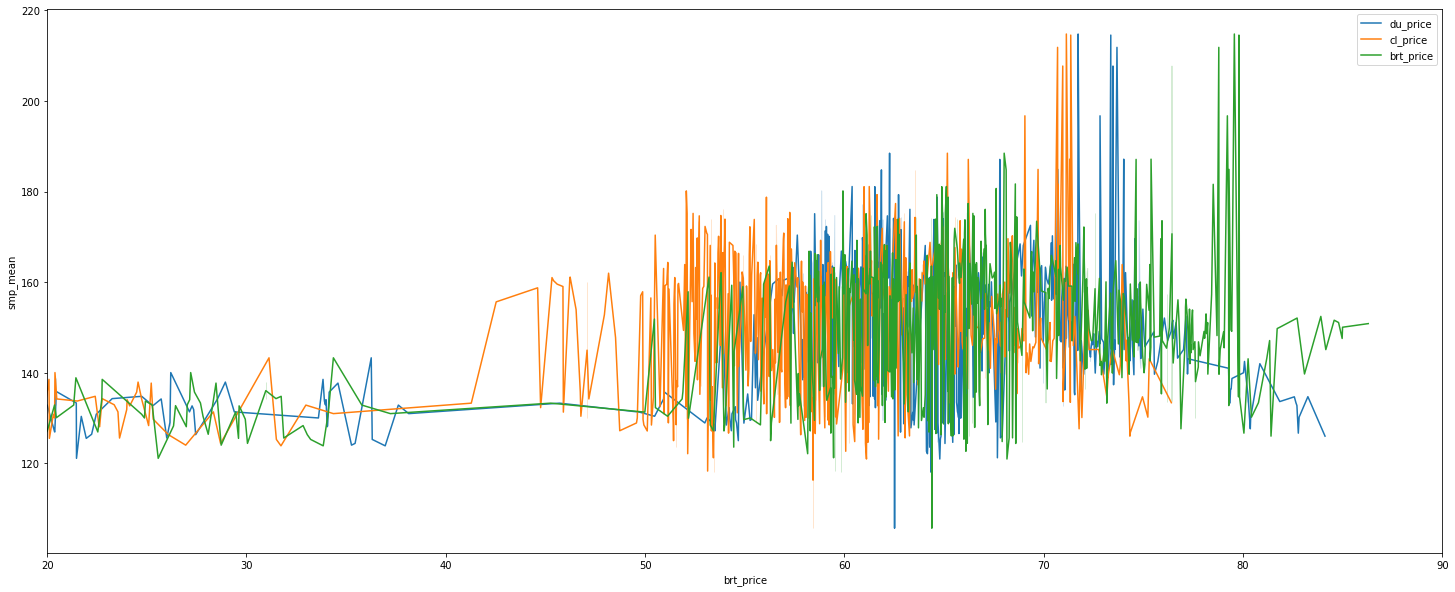

In [11]:
fig, ax = plt.subplots(figsize = (25,10))

sns.lineplot(x = oil_price_du['du_price'], y = target['smp_mean'], ax = ax, label = 'du_price')
sns.lineplot(x = oil_price_cl['cl_price'], y = target['smp_mean'], ax = ax, label = 'cl_price')
sns.lineplot(x = oil_price_brt['brt_price'], y = target['smp_mean'], ax = ax, label = 'brt_price')
plt.xlim(20, 90)
ax.legend()
plt.show()

### smp, supply, oil_pirce, weather를 합친 train 제작

In [37]:
train = hourly_smp.copy()

for table in ([oil_price_du, oil_price_cl, oil_price_brt, weather]) :
    train = pd.merge(train, table, on = ['date'])

train.head(5)

,smp,date,year_x,month_x,day_x,hour_x,du_price,cl_price,brt_price,temp,year_y,month_y,day_y,hour_y
0,116.84,2018-02-01,2018,2,1,1,66.73,65.8,69.65,4.7,2018,2,1,1
1,116.84,2018-02-01,2018,2,1,1,66.73,65.8,69.65,4.8,2018,2,1,2
2,116.84,2018-02-01,2018,2,1,1,66.73,65.8,69.65,4.8,2018,2,1,3
3,116.84,2018-02-01,2018,2,1,1,66.73,65.8,69.65,4.5,2018,2,1,4
4,116.84,2018-02-01,2018,2,1,1,66.73,65.8,69.65,4.5,2018,2,1,5


In [38]:
train_1 = train.iloc[:,0:2]
train_2 = train.iloc[:,6:]
train = pd.merge([train_1, train_2])

TypeError: merge() missing 1 required positional argument: 'right'

In [36]:
train

,brt_price,cl_price,date,day_y,du_price,hour_y,month_y,smp,temp,year_y
0,NaN,NaN,2018-02-01,NaN,NaN,NaN,NaN,116.84,NaN,NaN
1,NaN,NaN,2018-02-01,NaN,NaN,NaN,NaN,116.84,NaN,NaN
2,NaN,NaN,2018-02-01,NaN,NaN,NaN,NaN,116.84,NaN,NaN
3,NaN,NaN,2018-02-01,NaN,NaN,NaN,NaN,116.84,NaN,NaN
4,NaN,NaN,2018-02-01,NaN,NaN,NaN,NaN,116.84,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10684843,58.16,51.56,NaT,31.0,64.29,19.0,1.0,NaN,6.7,2020.0
10684844,58.16,51.56,NaT,31.0,64.29,20.0,1.0,NaN,6.5,2020.0
10684845,58.16,51.56,NaT,31.0,64.29,21.0,1.0,NaN,6.3,2020.0
10684846,58.16,51.56,NaT,31.0,64.29,22.0,1.0,NaN,6.5,2020.0


## train data의 feature간 상관관계 분석

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(train.corr(), annot = True, ax = ax, fmt = '.2f')

# 3. Machine learning modelling 

#### LSTM on keras

**temp column에 null값이 존재**  
**월별 평균 온도로 null값을 대체**  

In [ ]:
train.columns = ['smp', 'date', 'year', 'month', 'day', 'hour', 'du_price', 'cl_price', 'brt_price', 'temp']

In [ ]:
null_month = train[train['temp'].isnull()]['month']
null_month_list = []

for month in null_month :
    null_month_list.append(round(train[train['month'] == month]['temp'].mean(), 1))

train[train['temp'].isnull()]['temp'] = null_month_list

In [ ]:
train.info()

In [ ]:
print(len(train[train['temp'].isnull()]['temp']))
print(len(null_month_list))

### 두가지 모델로 나눔
#### 1) 이전의 smp 데이터를 바탕으로 다음 smp 예측
#### 2) 기상 데이터 및 원유가격 데이터를 바탕으로 smp 예측